In [208]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [209]:
texts = [
    '10 землекопов'
    'Согласуйте в репозитории',
    'Заявочка в джире',
    'Ёбанный стыд',
    'ПИДОРАСЫ',
    'НАЯБЫВАЮТ',
    'ГДЕ ТЗ',
    'Согласовано',
    'Лотус лежит',
    'Бан',
    'Не сходится',
    'ГДЕ ПРОДАЖИ',
    'Что Вы делали целый час?!',
    'Либо беременна, либо нет',
    'Временное - это залог постоянного',
    'Там правки по КУАПу',
    'Бля',
    'Ты сбрасывался?',
    'Какие ваши доказательства?',
    'Я там письмо написал',
    'У нас обед',
    'Когда на пиво идём?',
    'Просрочка по кешам в мае',
    'Там задача по PreCollection',
    'У IT нет ресурса',
    'ОК',
    'PR',
    'Согласуйте',
    'Заявочка в РЕПО',
    'Заявочка в JIRA',
    'DWH',
    'Нет доступа',
    'Дима, откуда эти цифры?',
    'Мне Яровой сказал',
    'Что там по Portmone?',
    'Где доходность?',
    'Где PnL?',
    'Когда SMS отправят?',
    'Где прозвон?',
    'Дрисня',
    'Ну а хули нам, удалёнщикам',
    'Это хуйня!',
    'Виноваты риски',
    'Виноваты IT',
    'У нас ЧП',
    'Отчётов нет',
    'Оно ещё обновляется',
    'Где отчёты',
    'Ищите в анале',
    'Тексты на согласовании',
    'Го курить',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
]

In [210]:
texts = [t for t in texts if t!='']

In [211]:
mask = np.array(Image.open(r'C:\Users\saloe\Desktop\бкд.png'))

In [212]:
state = 228
rs = np.random.RandomState(state)

In [213]:
wc = WordCloud(max_words=1000, margin=10, mask=mask,
               random_state=state)


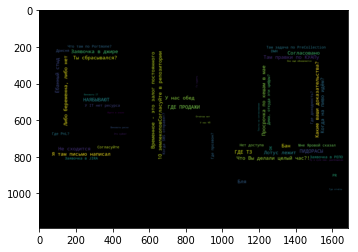

In [214]:
plt.imshow(wc.generate_from_frequencies({t: 1 for t in texts}).recolor(random_state=state), interpolation="bilinear")

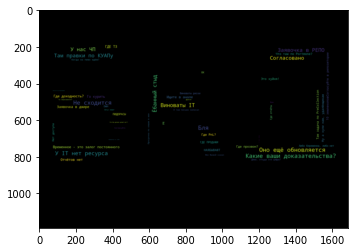

In [215]:
plt.imshow(wc.generate_from_frequencies({t: rs.random() for t in texts}).recolor(random_state=state),
           interpolation="bilinear")


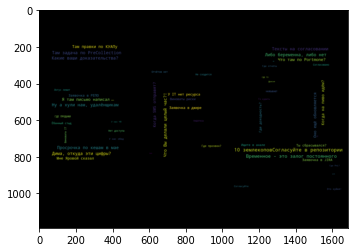

In [216]:
plt.imshow(wc.generate_from_frequencies({t: len(t) for t in texts}).recolor(random_state=state), interpolation="bilinear")

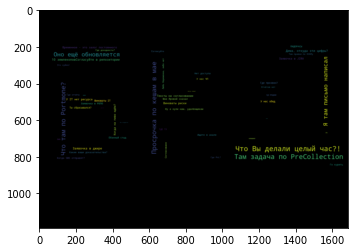

In [217]:
plt.imshow(wc.generate_from_frequencies({t: len(t)*rs.random() for t in texts}).recolor(random_state=state), interpolation="bilinear")

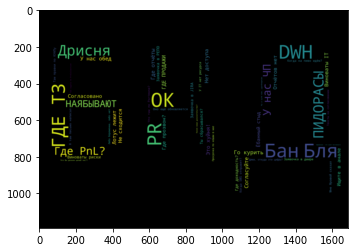

In [218]:
plt.imshow(wc.generate_from_frequencies({t: max(map(len, texts)) - len(t) for t in texts}).recolor(random_state=state),
           interpolation="bilinear")

with open('main.svg', 'wb') as f:
    f.write(wc.generate_from_frequencies({t: max(map(len, texts)) - len(t) for t in texts}).recolor(
        random_state=state).to_svg().encode('utf8'))


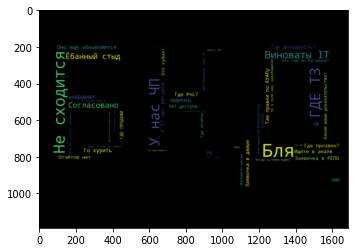

In [219]:
rs = np.random.RandomState(state)
plt.imshow(wc.generate_from_frequencies({t: (max(map(len, texts)) - len(t)) * rs.random() for t in texts}).recolor(
    random_state=state), interpolation="bilinear")

with open('main_w_random.svg', 'wb') as f:
    f.write(wc.generate_from_frequencies({t: max(map(len, texts)) - len(t) for t in texts}).recolor(
        random_state=state).to_svg().encode('utf8'))
